In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
from sklearn.linear_model import LogisticRegression

### Loading data into dataframe
**spliting data into dataframe target and features dataframe**

In [3]:
iris = load_iris()

In [4]:
df_data = pd.DataFrame(iris.data)

In [4]:
df_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df_data.drop(columns=[0,1], inplace= True)
df_data.head()

,2,3
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
df_target = pd.DataFrame(iris.target)

In [7]:
df_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [8]:
df_data.rename(columns= {2:"petal_length", 3:"petal_width"}, inplace = True)
df_data.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [9]:
df_target.rename(columns={0:"y"}, inplace = True)


In [10]:
df_target.head()

,y
0,0
1,0
2,0
3,0
4,0


### Binarizing the label

In [11]:
def Bin(df_target, label):
    df_copy=df_target.copy()
    if label == 0:
        df_copy[df_copy['y']==1]=-1
        df_copy[df_copy['y']==2]=-1
        df_copy[df_copy['y']==0]=1
    elif label == 1:
        df_copy[df_copy['y']==2]=-1
        df_copy[df_copy['y']==0]=-1
        df_copy[df_copy['y']==1]=1
    elif label == 2:
        df_copy[df_copy['y']==1]=-1
        df_copy[df_copy['y']==0]=-1
        df_copy[df_copy['y']==2]=1

    return df_copy




In [12]:
df_0 = Bin(df_target, 0)
df_0['y'].value_counts()


-1    100
 1     50
Name: y, dtype: int64

In [13]:
df_1 = Bin(df_target, 1)
df_1['y'].value_counts()

-1    100
 1     50
Name: y, dtype: int64

In [14]:
df_2 = Bin(df_target,2)
df_2['y'].value_counts()

-1    100
 1     50
Name: y, dtype: int64

### Building SVC Model Classifier

In [15]:
# y1 = []
# y2 = []
# y3 = []
models = []
svm_predictions = []
for i in range(0,3):
    df_label = Bin(df_target,i)

    X_train = df_data
    y_train = df_label
    svclassifier = SVC(probability=True)
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_train)
    svm_predictions.append(y_pred)
    models.append(svclassifier)
#     if i == 0:
#         y1=y_pred
#     elif i == 1:
#         y2=y_pred
#     elif i == 2:
#         y3=y_pred

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
svmarg_predictions= np.argmax(svm_predictions, axis=0)
svmarg_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [17]:
models[0].predict(df_data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [23]:
LR_predictions = []
LR_models = []
for i in range(0,3):
    df_labelLR = Bin(df_target,i)
    X_train = df_data
    y_trainLR = df_labelLR
    LR = LogisticRegression(random_state=0).fit(X_train, y_trainLR)
    LR_models.append(LR)
    y_predLR = LR.predict(X_train)
    LR_predictions.append(y_predLR)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Evaluation

In [18]:
from sklearn.metrics import classification_report , confusion_matrix

In [19]:
import seaborn as sn

In [20]:
print(classification_report(svmarg_predictions , df_target))
print(confusion_matrix(svmarg_predictions , df_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.91      0.93        53
           2       0.90      0.96      0.93        47

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

[[50  0  0]
 [ 0 48  5]
 [ 0  2 45]]


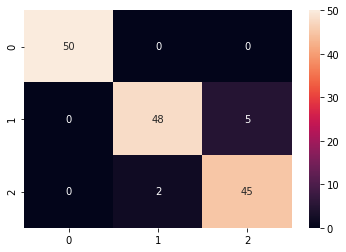

In [21]:
sn.heatmap(confusion_matrix(svmarg_predictions , df_target), annot=True)

In [24]:
LR_predictions

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1

In [25]:
LRG_predictions= np.argmax(LR_predictions, axis=0)
LRG_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [26]:
print(classification_report(LRG_predictions , df_target))
print(confusion_matrix(LRG_predictions , df_target))

              precision    recall  f1-score   support

           0       1.00      0.51      0.68        98
           1       0.02      0.08      0.03        12
           2       0.74      0.93      0.82        40

    accuracy                           0.59       150
   macro avg       0.59      0.51      0.51       150
weighted avg       0.85      0.59      0.66       150

[[50 46  2]
 [ 0  1 11]
 [ 0  3 37]]


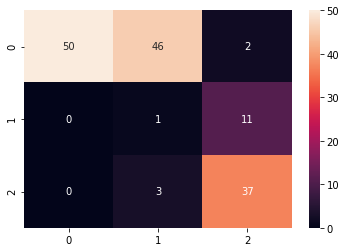

In [27]:
sn.heatmap(confusion_matrix(LRG_predictions , df_target), annot=True)

### Plotting DataPoints and Regions

In [28]:
def plotData(df, df_target, model):
    
    for i in range(0,3):
        colors = ['r', 'b']
        markers = ['o', '*']
        
        zeros= df_target[df_target['y']==0].index
        ones= df_target[df_target['y']== 1].index
        twos = df_target[df_target['y']==2].index
        if i ==0:
            plt.scatter(df.iloc[zeros,0],df.iloc[zeros,1],c = colors[0], marker= markers[0])                    
            plt.scatter(df.iloc[ones,0],df.iloc[ones,1],c = colors[1], marker= markers[1])
            plt.scatter(df.iloc[twos,0],df.iloc[twos,1],c = colors[1], marker= markers[1])
            #plt.show()
        elif i ==1:
            plt.scatter(df.iloc[ones,0],df.iloc[ones,1],c = colors[0], marker= markers[0])                    
            plt.scatter(df.iloc[zeros,0],df.iloc[zeros,1],c = colors[1], marker= markers[1])
            plt.scatter(df.iloc[twos,0],df.iloc[twos,1],c = colors[1], marker= markers[1])
            #plt.show()
        elif i == 2:
            plt.scatter(df.iloc[twos,0],df.iloc[twos,1],c = colors[0], marker= markers[0])                    
            plt.scatter(df.iloc[ones,0],df.iloc[ones,1],c = colors[1], marker= markers[1])
            plt.scatter(df.iloc[zeros,0],df.iloc[zeros,1],c = colors[1], marker= markers[1])
        
        Title = "Iris Dataset with 3"
        plt.title(Title)
        plt.xlabel('Petal Length (cm)' )
        plt.ylabel('Petal width (cm)' )
        if model == "svm":
            plotRegions(models[i])
        elif model == "LR":
            plotRegions(LR_models[i])
        plt.show()
        

In [29]:
def plotRegions(model):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[ 0], xlim[1], 50)
    yy = np.linspace(ylim[ 0], ylim[1], 50)
    XX, YY = np.meshgrid(xx, yy)
    z = np.vstack([XX.ravel(), YY.ravel()]).T
    ZZ = model.decision_function(z) .reshape(XX.shape)
    ax.contourf(XX, YY, ZZ, colors=[ 'c','y'], levels=0, alpha=0.2)

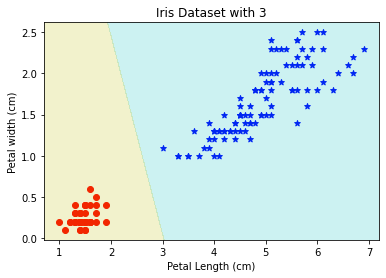

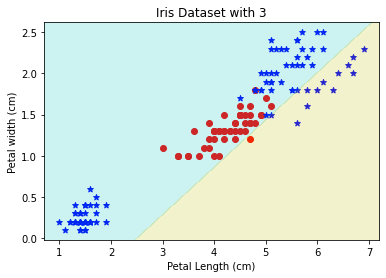

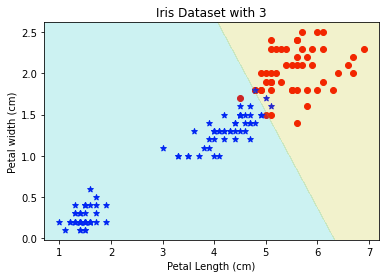

In [30]:
plotData(df_data, df_target,"LR")

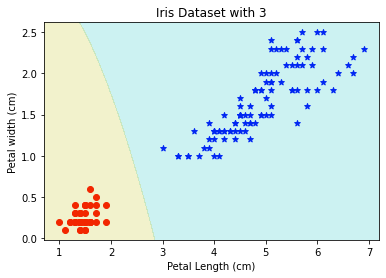

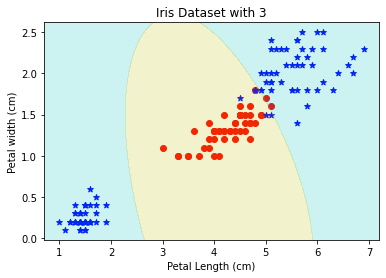

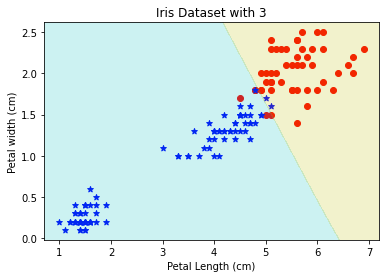

In [31]:
plotData(df_data, df_target,"svm")

In [32]:
from scipy.special import softmax

In [33]:
svm_predictions

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1

In [34]:
np.argmin([pred*-1 for pred in svm_predictions], axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [35]:
(svm_predictions)

[array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1

In [36]:
voting_svm = pd.DataFrame(svm_predictions)

In [37]:
voting_svm.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


## Alternative
**This method is built on ensembling model in machine learning refernce https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f**

**our is Alternative is much better in Logistic Regression. that's very obvious from the confusion matrix and 
model evaluation. we have much higher Accuracy in our alternative model so at the end we found that the problem will perform less with first method**


In [38]:
from sklearn.ensemble import VotingClassifier
voting_svm = VotingClassifier(estimators=[('svm0', models[0]),('svm1', models[1]),
                                          ('svm2', models[2])], voting = 'soft')
voting_svm = voting_svm.fit(df_data,df_target)
voting_svm_result = voting_svm.predict(df_data)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [39]:
print(classification_report(voting_svm_result , df_target))
print(confusion_matrix(voting_svm_result , df_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        49
           2       0.96      0.94      0.95        51

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  2]
 [ 0  3 48]]


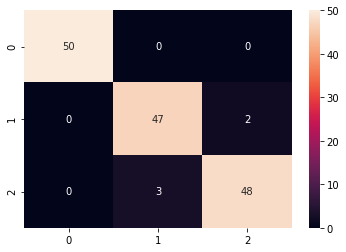

In [40]:
sn.heatmap(confusion_matrix(voting_svm_result , df_target), annot=True)

In [41]:
voting_LR = VotingClassifier(estimators=[('LR0', LR_models[0]),('LR1', LR_models[1]),
                                          ('LR2', LR_models[2])], voting = 'hard')
voting_LR = voting_LR.fit(df_data,df_target)
voting_LR_Result = voting_LR.predict(df_data)


C:\Users\moham\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
print(classification_report(voting_LR_Result , df_target))
print(confusion_matrix(voting_LR_Result , df_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        49
           2       0.96      0.94      0.95        51

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  2]
 [ 0  3 48]]


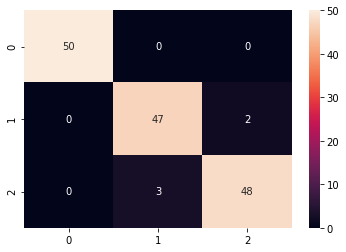

In [43]:
sn.heatmap(confusion_matrix(voting_LR_Result , df_target), annot=True)